<a href="https://colab.research.google.com/github/ivy13534/MPP-Akhir/blob/main/Project_Mpp_Andhika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   price                                           nav-link  \
0    179  https://www.rumah123.com/properti/sleman/hos17...   
1    170  https://www.rumah123.com/properti/sleman/hos17...   
2    695  https://www.rumah123.com/properti/sleman/hos17...   
3    560  https://www.rumah123.com/properti/sleman/hos17...   
4    200  https://www.rumah123.com/properti/sleman/hos17...   

                                         description   listing-location  bed  \
0  Rumah 2 Lantai Baru  di jalan Palagan Sleman Y...    Ngaglik, Sleman    3   
1                  RUMAH BARU DEKAT AL AZHAR DAN UGM     Jombor, Sleman    3   
2  RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...     Berbah, Sleman    2   
3  Rumah Murah 5 Menit Dari Candi Prambanan Tersi...  Prambanan, Sleman    3   
4          Rumah Murah Cicilan 1jt Di Moyudan Sleman    Moyudan, Sleman    2   

   bath  carport  surface_area  building_area  
0     3      2.0           120            110  
1     2      1.0           102            12

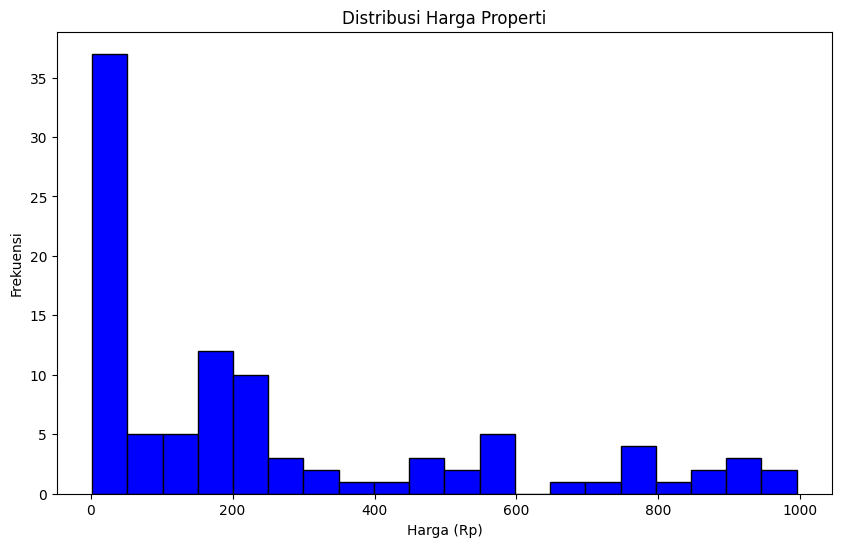

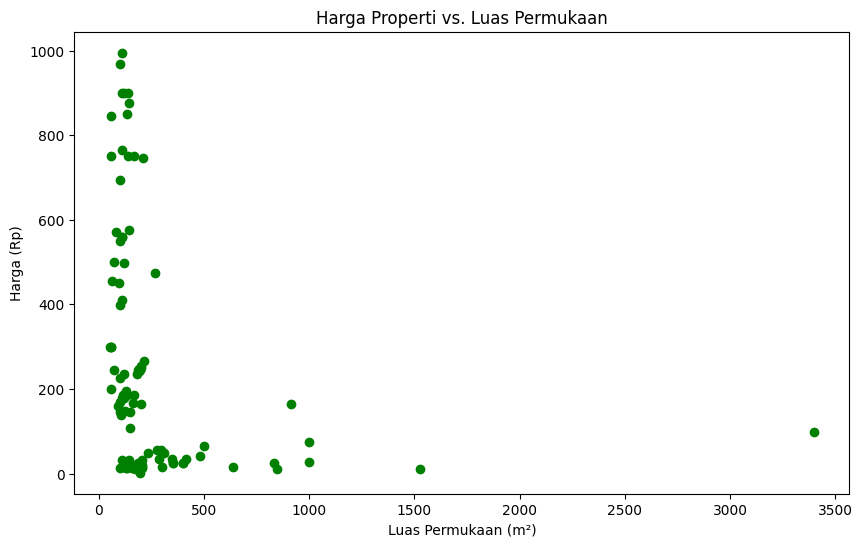

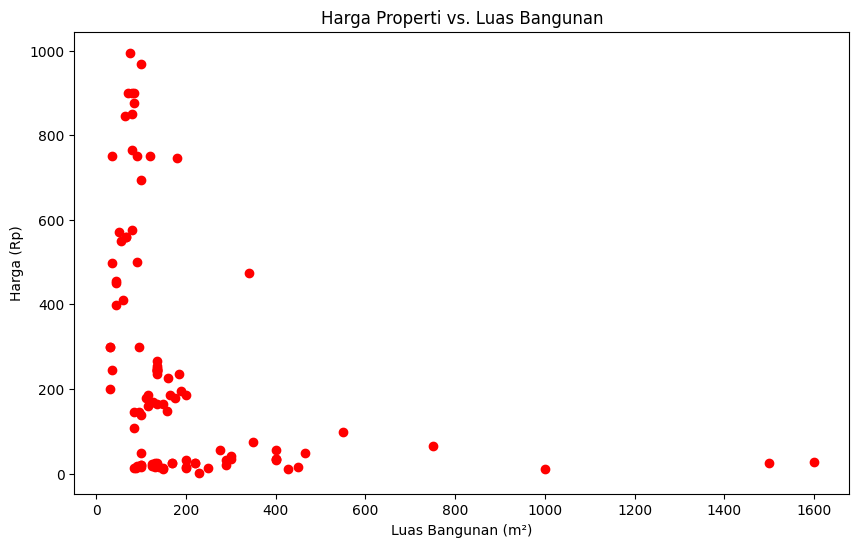

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Membaca 100 baris pertama dari file CSV
df = pd.read_csv('/content/drive/MyDrive/Mpp-Akhir/rumah123_yogya_unfiltered.csv', nrows=100)

# Fungsi untuk membersihkan kolom harga
def clean_price(price):
    price = re.sub(r'[^\d]', '', price)  # Menghapus karakter non-digit
    return int(price) if price.isdigit() else 0

# Fungsi untuk membersihkan kolom luas
def clean_area(area):
    area = re.sub(r'[^\d]', '', area)  # Menghapus karakter non-digit
    return int(area) if area.isdigit() else 0

# Membersihkan kolom harga
df['price'] = df['price'].apply(clean_price)

# Membersihkan kolom luas permukaan dan luas bangunan
df['surface_area'] = df['surface_area'].apply(clean_area)
df['building_area'] = df['building_area'].apply(clean_area)

# Tampilkan 5 baris pertama setelah pembersihan
print(df.head())

# Histogram harga properti
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='blue', edgecolor='black')
plt.title('Distribusi Harga Properti')
plt.xlabel('Harga (Rp)')
plt.ylabel('Frekuensi')
plt.show()

# Scatter plot antara luas permukaan dan harga properti
plt.figure(figsize=(10, 6))
plt.scatter(df['surface_area'], df['price'], color='green')
plt.title('Harga Properti vs. Luas Permukaan')
plt.xlabel('Luas Permukaan (m²)')
plt.ylabel('Harga (Rp)')
plt.show()

# Scatter plot antara luas bangunan dan harga properti
plt.figure(figsize=(10, 6))
plt.scatter(df['building_area'], df['price'], color='red')
plt.title('Harga Properti vs. Luas Bangunan')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga (Rp)')
plt.show()

Yahoo Finance

[*********************100%%**********************]  1 of 1 completed


             Open        High         Low       Close   Adj Close  \
count   21.000000   21.000000   21.000000   21.000000   21.000000   
mean   425.648096  428.920477  422.294287  426.680000  426.680000   
std      7.261753    7.991980    8.634264    8.455520    8.455520   
min    412.429993  416.429993  404.510010  413.519989  413.519989   
25%    421.799988  424.299988  418.029999  420.989990  420.989990   
50%    425.480011  428.079987  423.890015  427.000000  427.000000   
75%    429.630005  432.820007  425.690002  430.320007  430.320007   
max    440.850006  443.399994  439.369995  442.570007  442.570007   

             Volume  Daily Return  
count  2.100000e+01     20.000000  
mean   1.824156e+07      0.002563  
std    7.727329e+06      0.011237  
min    1.184580e+07     -0.033786  
25%    1.455110e+07     -0.001647  
50%    1.596060e+07      0.001722  
75%    1.753010e+07      0.008895  
max    4.799530e+07      0.019368  


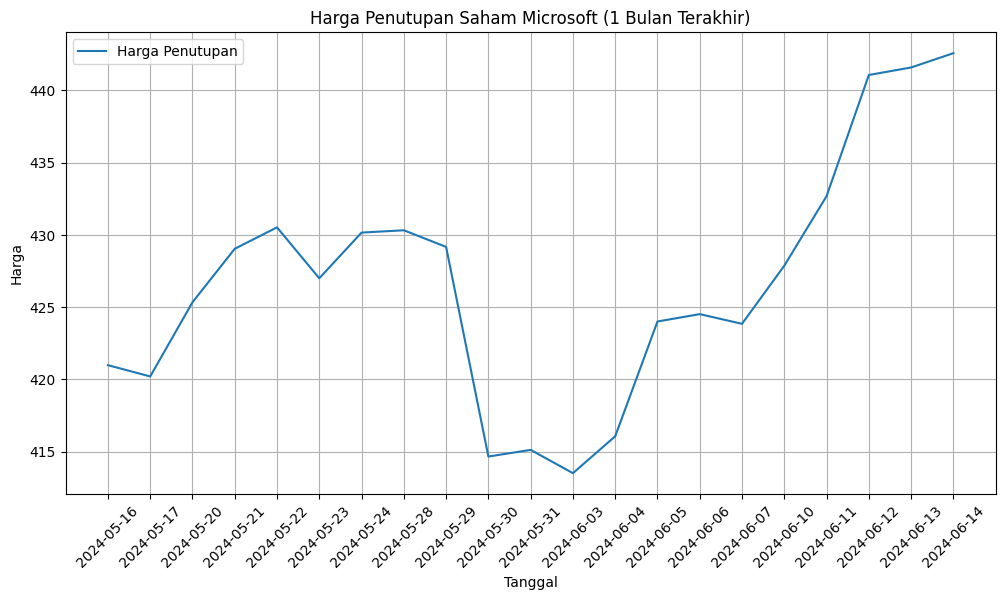

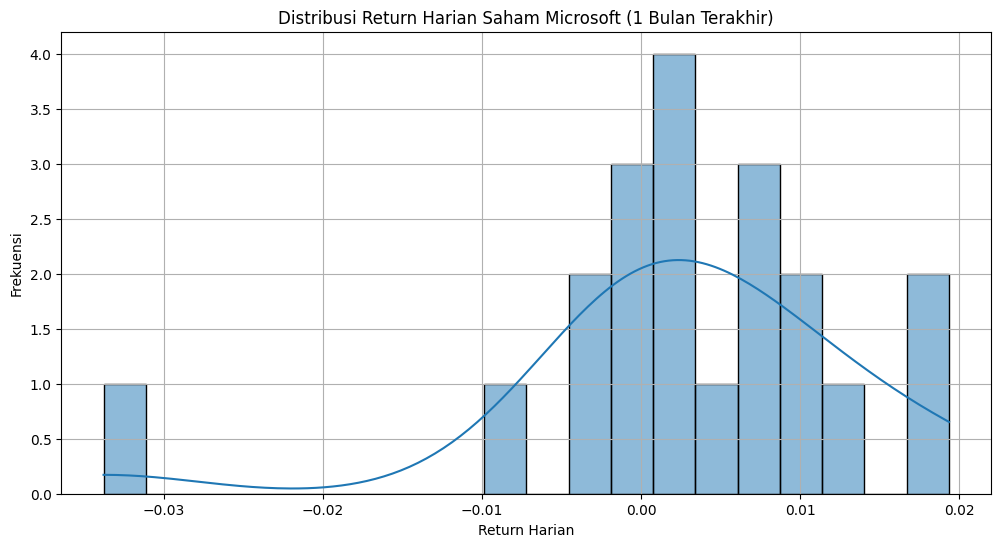

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Menghitung rentang tanggal untuk 1 bulan sebelum hari ini
tanggal_hari_ini = datetime.now()
tanggal_1_bulan_sebelum_ini = tanggal_hari_ini - timedelta(days=30)

# Konversi tanggal ke dalam format string yang dikenali oleh yfinance
start_date = tanggal_1_bulan_sebelum_ini.strftime('%Y-%m-%d')
end_date = tanggal_hari_ini.strftime('%Y-%m-%d')

# Mengambil data historis saham Microsoft dari Yahoo Finance
ticker = 'MSFT'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Simpan data ke dalam file CSV
stock_data.to_csv('historis_saham_msft.csv')

# Memuat data dari file CSV ke dalam DataFrame
df_loaded = pd.read_csv('historis_saham_msft.csv')

# Menghitung return harian
df_loaded['Daily Return'] = df_loaded['Close'].pct_change()

# Statistik deskriptif
print(df_loaded.describe())

# Visualisasi harga penutupan harian
plt.figure(figsize=(12, 6))
plt.plot(df_loaded['Date'], df_loaded['Close'], label='Harga Penutupan')
plt.title('Harga Penutupan Saham Microsoft (1 Bulan Terakhir)')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Visualisasi return harian
plt.figure(figsize=(12, 6))
sns.histplot(df_loaded['Daily Return'].dropna(), bins=20, kde=True)
plt.title('Distribusi Return Harian Saham Microsoft (1 Bulan Terakhir)')
plt.xlabel('Return Harian')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()